#### A report by the Health Effects Institute on air pollution in India (2018) reports that air pollution was responsible for 1.1 million deaths in India in 2015.


 
#### Being a Data Scientist, I decided to analyze the air quality data of my own country to find some underlying principles or patterns which might give me an insight into how severe the problem is and I must say the results were worth sharing.

#### So, here In this  Project, we will do some analysis on the air quality of India.

#### Let’s start with importing the libraries:



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Download and load the data set

In [2]:
data=pd.read_csv('data.csv',encoding='latin1')

#### Let us get some insights about the data the number of entries in each column, the type of entry in each row, etc.

In [3]:
data

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

##### Now, let us check the null values.

In [5]:
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [6]:
data.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [7]:
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [8]:
data.shape

(435742, 13)

### Visualization for states with highest pollutants

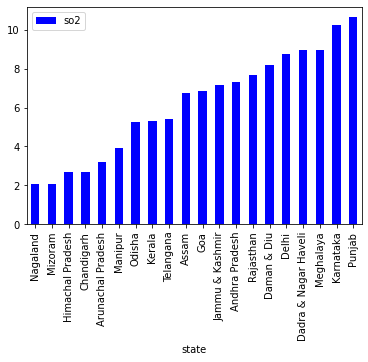

In [9]:
data[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').head(20).plot.bar(color='b')
plt.show()

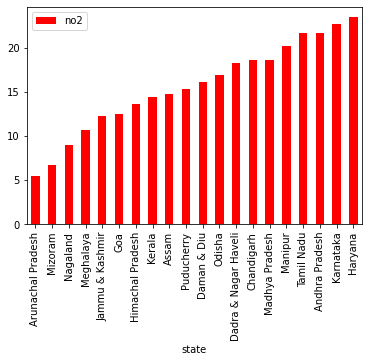

In [10]:
data[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').head(20).plot.bar(color='r')
plt.show()

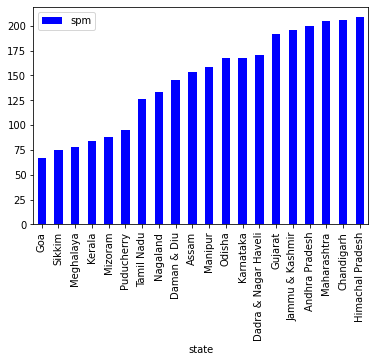

In [11]:
data[['spm','state']].groupby(["state"]).mean().sort_values(by='spm').head(20).plot.bar(color='b')
plt.show()

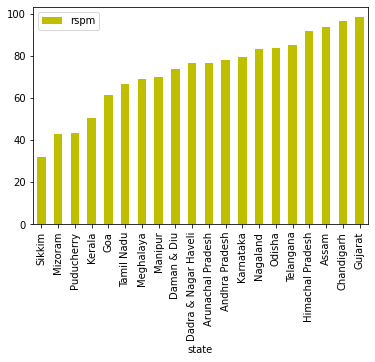

In [12]:
plt.show()

### DROP UNNECESSARY COLUMN

In [13]:
data.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [14]:
total = data.isnull().sum().sort_values(ascending=False)

In [15]:
total.head()

pm2_5       426428
spm         237387
agency      149481
stn_code    144077
rspm         40222
dtype: int64

In [16]:
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)  #count(returns Non-NAN value)

In [17]:

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [18]:

missing_data.head()

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692


### MISSING VALUE PERCENT

Text(0.5, 1.0, 'Percent missing data by feature')

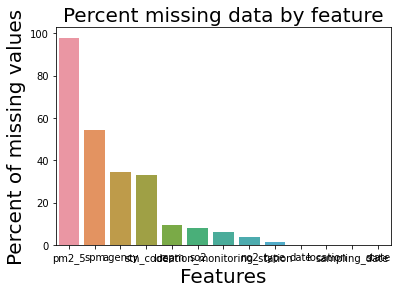

In [44]:

sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)

### CHECKING DATA DISTRIBUTION

(array([4.07548e+05, 2.30180e+04, 1.02600e+03, 6.10000e+01, 1.10000e+01,
        4.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00]),
 array([   0.,  400.,  800., 1200., 1600., 2000., 2400., 2800., 3200.,
        3600., 4000.]),
 <a list of 10 Patch objects>)

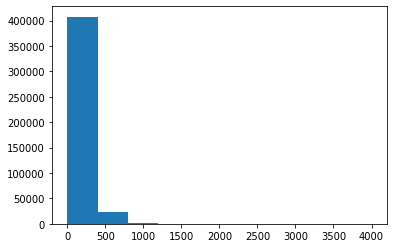

In [45]:
plt.hist(data.spm,range=(0.0,4000))

(array([4.35165e+05, 4.81000e+02, 6.40000e+01, 2.10000e+01, 6.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

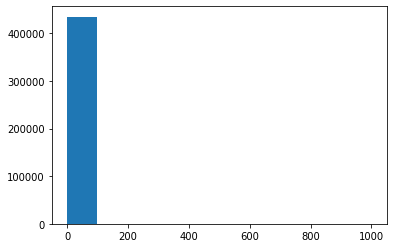

In [46]:
plt.hist(data.so2,range=(0,1000)) #so2

(array([4.32458e+05, 3.10400e+03, 1.32000e+02, 3.20000e+01, 7.00000e+00,
        3.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

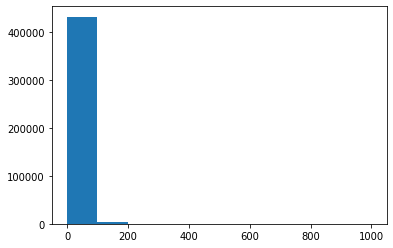

In [47]:
plt.hist(data.no2,range=(0,1000)) #no2

(array([2.38341e+05, 1.52847e+05, 3.53940e+04, 6.80600e+03, 1.61300e+03,
        5.01000e+02, 1.42000e+02, 5.60000e+01, 2.30000e+01, 9.00000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

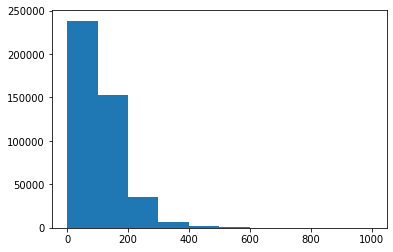

In [48]:
plt.hist(data.rspm,range=(0,1000)) #rspm

(array([1.23295e+05, 3.47000e+02, 3.90000e+01, 7.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

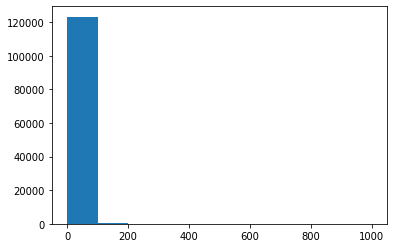

In [49]:
plt.hist(data.pm2_5,range=(0,1000)) #pm2_5

In [50]:
grp_state = data.groupby('state')

In [51]:
def impute_mean_by_state(series):
    return series.fillna(series.mean())

In [52]:

data['rspm']=grp_state['rspm'].transform(impute_mean_by_state)  #fill value with mean value group by state
data['so2']=grp_state['so2'].transform(impute_mean_by_state)
data['no2']=grp_state['no2'].transform(impute_mean_by_state)
data['spm']=grp_state['spm'].transform(impute_mean_by_state)
data['pm2_5']=grp_state['pm2_5'].transform(impute_mean_by_state)

In [53]:

data.describe()

,so2,no2,rspm,spm,pm2_5,SOi,Noi
count,435739.000000,435739.000000,435739.000000,431671.000000,123689.000000,435742.000000,435739.000000
mean,10.589141,25.663170,109.680907,215.198748,48.317274,13.137588,31.960733
std,10.863679,18.271145,72.519399,117.470157,21.455206,12.085914,21.976656
min,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,4.800000,14.000000,59.000000,142.000000,30.729696,6.000000,17.500000
50%,8.000000,21.800000,93.000000,205.255823,42.204089,10.000000,27.250000
75%,13.000000,32.000000,142.016832,248.000000,64.890625,16.250000,40.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000,313.625000,796.666667


In [54]:
data.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                                 3
no2                                 3
rspm                                3
spm                              4071
location_monitoring_station     27491
pm2_5                          312053
date                                7
SOi                                 0
Noi                                 3
dtype: int64

### CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA¶

The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used$$\begin{equation*}
I = I_{low} +  \frac{I_{high}-I_{low}}{C_{high}-C_{low}}{(C-C_{low})}
\end{equation*}$$

In [55]:
from IPython.display import Image
Image(url= "http://airquality.deq.idaho.gov/Information_AQI_files/image002.jpg")

In [63]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['SOi']=data['so2'].apply(cal_SOi)
df= data[['so2','SOi']]
df.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


### CALCULATE AIR QUALITY INDEX FOR no2 BASED ON FORMULA

In [64]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['Noi']=data['no2'].apply(cal_Noi)
df= data[['no2','Noi']]
df.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


### CALCULATE AIR QUALITY INDEX FOR rspm BASED ON FORMULA

In [58]:

def cal_RSPMi(rspm):
    rpi=0
    if(rspm<=100):
     rpi = rspm
    elif(rspm>=101 and rspm<=150):
     rpi= 101+(rspm-101)*((200-101)/(150-101))
    elif(rspm>=151 and rspm<=350):
     ni= 201+(rspm-151)*((300-201)/(350-151))
    elif(rspm>=351 and rspm<=420):
     ni= 301+(rspm-351)*((400-301)/(420-351))
    elif(rspm>420):
     ni= 401+(rspm-420)*((500-401)/(420-351))
    return rpi
data['RSPMi']=data['rspm'].apply(cal_RSPMi)
df= data[['rspm','RSPMi']]
df.head()

,rspm,RSPMi
0,78.182824,78.182824
1,78.182824,78.182824
2,78.182824,78.182824
3,78.182824,78.182824
4,78.182824,78.182824


In [59]:
df.tail()

,rspm,RSPMi
435737,143.0,185.857143
435738,171.0,0.000000
435739,NaN,0.000000
435740,NaN,0.000000
435741,NaN,0.000000


### CALCULATE AIR QUALITY INDEX FOR Spm BASED ON FORMULA

In [65]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
data['SPMi']=data['spm'].apply(cal_SPMi)
df= data[['spm','SPMi']]
df.head()

,spm,SPMi
0,200.260378,166.840252
1,200.260378,166.840252
2,200.260378,166.840252
3,200.260378,166.840252
4,200.260378,166.840252


### CALCULATE AIR QUALITY INDEX FOR pm2_5 BASED ON FORMULA

In [70]:
def cal_pmi(pm2_5):
    pmi=0
    if(pm2_5<=50):
     pmi=pm2_5*(50/50)
    elif(pm2_5>50 and pm2_5<=100):
     pmi=50+(pm2_5-50)*(50/50)
    elif(pm2_5>100 and pm2_5<=250):
     pmi= 100+(pm2_5-100)*(100/150)
    elif(pm2_5>250 and pm2_5<=350):
     pmi=200+(pm2_5-250)*(100/100)
    elif(pm2_5>350 and pm2_5<=450):
     pmi=300+(pm2_5-350)*(100/100)
    else:
     pmi=400+(pm2_5-430)*(100/80)
    return pmi
data['PMi']=data['pm2_5'].apply(cal_pmi)
df= data[['pm2_5','PMi']]
df.head()

,pm2_5,PMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [71]:

type(data['PMi'])

pandas.core.series.Series

### Based on the measured ambient concentrations, corresponding standards and likely health impact, a sub-index is calculated for each of these pollutants. The worst sub-index reflects overall AQI.If multiple pollutants are measured at a monitoring site, then the largest or "dominant" AQI value is reported for the location

In [68]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi ):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi ):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

data['AQI']=data.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['RSPMi'],x['SPMi']),axis=1)
df= data[['state','SOi','Noi','RSPMi','SPMi','AQI']]
df.head()

,state,SOi,Noi,RSPMi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,78.182824,166.840252,166.840252
1,Andhra Pradesh,3.875,8.750,78.182824,166.840252,166.840252
2,Andhra Pradesh,7.750,35.625,78.182824,166.840252,166.840252
3,Andhra Pradesh,7.875,18.375,78.182824,166.840252,166.840252
4,Andhra Pradesh,5.875,9.375,78.182824,166.840252,166.840252


### Graph Overview:- Visualization of AQI across india (Year-wise)


In [69]:
data.fillna(0.0,inplace=True)
states=data.groupby(['state','location'],as_index=False).mean()
state=states.groupby(['state'],as_index=False).mean()
state

,state,so2,no2,rspm,spm,pm2_5,SOi,Noi,RSPMi,SPMi,PMi,AQI
0,Andhra Pradesh,7.005150,17.705235,73.718197,197.085630,0.000000,8.740983,22.091476,68.994411,165.285154,0.000000,165.753512
1,Arunachal Pradesh,3.179104,5.469697,76.629213,0.000000,0.000000,3.973881,6.837121,74.899282,0.000000,0.000000,0.000000
2,Assam,6.297072,14.122107,79.860142,141.421396,0.000000,7.871341,17.652233,65.249856,126.050825,0.000000,128.793002
3,Bihar,33.321814,42.324845,123.705176,281.948937,0.000000,40.939075,52.833105,135.910884,233.301398,0.000000,238.529738
4,Chandigarh,2.676986,18.619404,96.587079,206.056150,0.000000,3.346232,23.271826,78.578839,174.128162,0.000000,174.508849
5,Chhattisgarh,11.964182,25.336867,127.909085,233.774753,0.000000,14.955227,31.670710,83.921860,192.639060,0.000000,193.247170
6,Dadra & Nagar Haveli,8.037770,15.451606,76.720537,149.020211,30.511628,10.047213,19.314507,78.294990,132.029920,30.511628,135.720827
7,Daman & Diu,7.339134,12.615693,73.749431,127.996169,27.886364,9.173918,15.769616,74.875855,114.877290,27.886364,119.828807
8,Delhi,8.737273,53.489147,196.639771,399.402088,95.113208,10.908845,65.928540,36.515153,332.640733,94.889452,332.674327
9,Goa,7.424731,11.790294,59.443098,57.524474,18.995716,9.254478,14.737801,55.295277,56.055605,18.984334,71.566025


### AQI RANGE for corresponding AQI valu

In [ ]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

data['AQI_Range'] = data['AQI'] .apply(AQI_Range)
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
0,150,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,0,0.0,1990-02-01,6.000,21.750,78.182824,166.840252,0.0,166.840252,Poor
1,151,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,78.182824,200.260378,0,0.0,1990-02-01,3.875,8.750,78.182824,166.840252,0.0,166.840252,Poor
2,152,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,0,0.0,1990-02-01,7.750,35.625,78.182824,166.840252,0.0,166.840252,Poor
3,150,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,0,0.0,1990-03-01,7.875,18.375,78.182824,166.840252,0.0,166.840252,Poor
4,151,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,78.182824,200.260378,0,0.0,1990-03-01,5.875,9.375,78.182824,166.840252,0.0,166.840252,Poor


In [ ]:

d=data #saving data in new value
d.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
0,150,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,0,0.0,1990-02-01,6.000,21.750,78.182824,166.840252,0.0,166.840252,Poor
1,151,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,78.182824,200.260378,0,0.0,1990-02-01,3.875,8.750,78.182824,166.840252,0.0,166.840252,Poor
2,152,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,0,0.0,1990-02-01,7.750,35.625,78.182824,166.840252,0.0,166.840252,Poor
3,150,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,0,0.0,1990-03-01,7.875,18.375,78.182824,166.840252,0.0,166.840252,Poor
4,151,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,78.182824,200.260378,0,0.0,1990-03-01,5.875,9.375,78.182824,166.840252,0.0,166.840252,Poor



### Remove the rows with null values

In [ ]:
data=data.dropna(subset=['spm'])

In [ ]:
data=data.dropna(subset=['pm2_5'])

In [ ]:
data.isna().sum()

stn_code                       0
sampling_date                  0
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
pm2_5                          0
date                           0
SOi                            0
Noi                            0
RSPMi                          0
SPMi                           0
PMi                            0
AQI                            0
AQI_Range                      0
dtype: int64

### Linear Regression prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
X = data[['SOi','Noi','RSPMi','SPMi']]
y = data['AQI']
y.head()

0    166.840252
1    166.840252
2    166.840252
3    166.840252
4    166.840252
Name: AQI, dtype: float64

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [ ]:
X_train.head()

,SOi,Noi,RSPMi,SPMi
65062,20.0000,33.7500,93.000000,147.030016
201418,22.0875,50.8375,138.034082,257.670000
298400,15.8750,72.1250,0.000000,196.612617
358185,10.0000,28.7500,64.000000,117.819376
66339,26.2500,46.1250,0.000000,408.372093


In [ ]:
LR = LinearRegression() 
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Intercept',LR.intercept_)

Intercept 1.8258252603706069


In [ ]:
print('Coefficients',LR.coef_)

Coefficients [0.02433419 0.04469221 0.03931562 0.97620117]


In [ ]:
predictions = LR.predict(X_test)

Text(0, 0.5, 'AQI ')

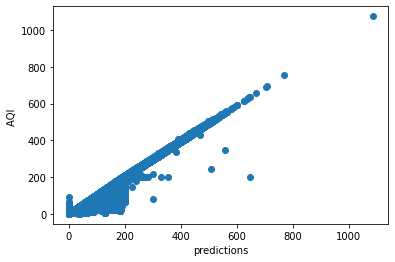

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('predictions')
plt.ylabel('AQI ')

In [ ]:

LR.score(X_test,y_test)

0.9883511274800427

In [ ]:
LR.predict([[4.8,21.75,78.18,100]])

array([103.60849718])

In [ ]:
LR.predict([[5.2,7.625,76.53,75.0]])

array([78.51705339])

<AxesSubplot:xlabel='AQI'>

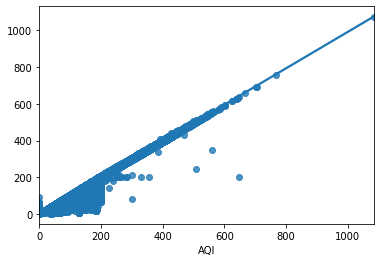

In [ ]:

sns.regplot(y_test,predictions)

In [ ]:
print('R^2_Square:%.2f '% r2_score(y_test, predictions))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, predictions)))

R^2_Square:0.99 
MSE:9.76 


### Linear Regression Model 2


In [ ]:
X1= data[['so2','no2','rspm','spm']]
y1 = data['AQI']
y.tail()

435737    189.004349
435738    189.004349
435739      0.000000
435740      0.000000
435741      0.000000
Name: AQI, dtype: float64

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.2,random_state=101)

In [ ]:
X_train1.head()

,so2,no2,rspm,spm
65062,16.00,27.00,93.000000,170.545024
201418,17.67,40.67,119.330000,307.670000
298400,12.70,57.70,210.000000,244.918926
358185,8.00,23.00,64.000000,126.729064
66339,21.00,36.90,196.639771,466.000000


In [ ]:
LR1 = LinearRegression()
LR1.fit(X_train1, y_train1)
prediction1 = LR1.predict(X_test1)

Text(0, 0.5, 'Predicted Y')

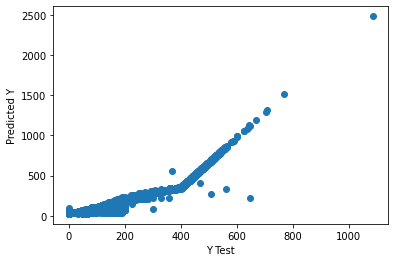

In [ ]:
plt.scatter(y_test1,prediction1) #scatter plot for actual and predicted values
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
LR1.predict([[9.1,16.3,67,179]])

array([155.91758782])

<AxesSubplot:xlabel='AQI'>

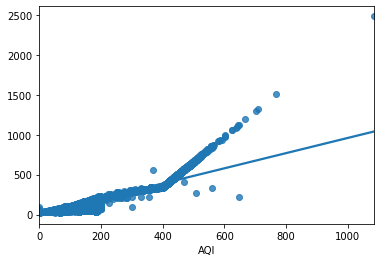

In [ ]:
sns.regplot(y_test1,prediction1) #regression plot

In [ ]:

y_test1_np= np.array(y_test1)
prediction1_np = np.array(prediction1)

In [ ]:
LR1.score(X_test1,y_test1)

0.9469175947933336

In [ ]:

print('R^2_Square:%.2f '% r2_score(y_test1, prediction1))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test1, prediction1)))

R^2_Square:0.95 
MSE:20.84 


### Logistic Regression¶

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X2 = data[['SOi','Noi','RSPMi','SPMi']]
y2 = data['AQI_Range']

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train2,y_train2)

LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test) #very low accuracy score

In [ ]:
logmodel.score(X_test2,y_test2)

0.6301818561146076

In [ ]:
logmodel.predict([[32.7,35,78.182,203]])

array(['Poor'], dtype=object)

In [72]:
# y = b0+ b1*x1 + b2*x2 + b3*x3 + b4*x4
# y = 1.8258252603706069 + 32.7(0.02433419) + 35(0.04469221) + 78.182(0.03931562) + 203(0.97620117)

In [88]:
import math
import numpy as np

In [97]:
def sigmoid(x):
  return 1 / (1 + math. exp(-x))

In [98]:
y_linear =1.8258252603706069 + 32.7*0.02433419 + 35*0.04469221 + 78.182*0.03931562 + 203*0.97620117
y # 205.4283919362106
p = sigmoid(y_linear)
p

1.0

In [99]:
y_linear2 = 1.8258252603706069 + 77.4*0.02433419 + 147.7*0.04469221 + 78.182*0.03931562 + 100*0.97620117
p = sigmoid(y_linear2)
p

1.0

In [100]:
np.log(p/1-p)

-inf

In [ ]:
logmodel.predict([[77.4,147.7,78.182,100]])

array(['Good'], dtype=object)

### Using Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train2,y_train2)

RandomForestClassifier(n_estimators=10)

In [ ]:
model.score(X_test2,y_test2)

0.9996661914531103

In [ ]:
X_train2.head()

,SOi,Noi,RSPMi,SPMi
223995,13.75,15.000,51.000000,80.000000
316706,11.25,17.500,115.142857,196.612617
253607,20.00,45.000,73.000000,170.170549
149585,15.00,27.500,55.000000,145.334495
418919,7.00,49.875,52.000000,117.333333


In [ ]:
model.predict([[2.059,8.94,102,256]])

array(['Unhealthy'], dtype=object)


#### Conclusion
#### AQI is highly correlated with all the independent variables(so2, no2, rspm, spm)
#### AQI has been increasing over the years.

#### Best models for AQI range classification :
#### Random Forest Classifier
